# Lab 5 (optional): PyTorch AutoGrad

# Chain rule in a neuron
We can imagine a neural network as a massive computational graph. PyTorch automatically sets up that graph for us.

Let us say we have a “neuron” f in that computational graph with inputs $x$ and $y$ which outputs $z$.

We can easily compute the local gradients — differentiating $z$ with respect to $x$ and $y$ as $\frac{\partial z}{\partial x}$ and $\frac{\partial z}{\partial y}$.

From the forward pass, we obtain the loss ($L$).

When we start to work the loss backwards, we get the gradient of the loss from the layer above $\frac{\partial L}{\partial z}$

In order for the loss to be propagated backwards, we need to find $\frac{\partial L}{\partial x}$ and $\frac{\partial L}{\partial y}$.

These can be calculated using the chain rule, i.e., $\frac{\partial L}{\partial x} = \frac{\partial L}{\partial z}\frac{\partial z}{\partial x}$ and $\frac{\partial L}{\partial y} = \frac{\partial L}{\partial z}\frac{\partial z}{\partial y}$

![picture](https://miro.medium.com/v2/resize:fit:720/format:webp/1*NpYmr8RwZ3x32GTBUkbB4A.png)

**So what is the point?**

All we need to build computational graphs that enable automatic differentiation is to define a **forward** function and a **backward** function for each of the basic  operations (or neurons) we want in our model. We only need to do this once per operation, thereby avoiding the need for manual differentiation everytime we change the architecture of our model.

The **forward** function calculates the output ($z$).

The **backward** function calculates the local gradients (e.g., $\frac{\partial z}{\partial x}$ and $\frac{\partial z}{\partial y}$).

All the rest is taken care of by applying the chain rule, as explained above.

In the example below, we define those two functions for a *Legendre polynomial of degree three*. Having defined this neuron/operation once, we can use it as a building block to build models that can be automatically differentiated.

PyTorch, of cause, comes with such an implementation for all the common building blocks, such as multiplication, addition, sigmoid, convolution, etc.

## Resources

- [AutoGrad introduction](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py)

- [AutoGrad mechanics](https://pytorch.org/docs/stable/notes/autograd.html)

- [Blog post](https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95)

## Toy problem
Suppose we want to fit a third order polynomial to predict $y=\sin(x)$ in the interval $-\pi \le x \le \pi$.

Let's start out by generating some training data $\{y_i,x_i\}_{i=1}^{N}$, where $i$ iterates over the $N$ training samples.

In [ ]:
%matplotlib inline

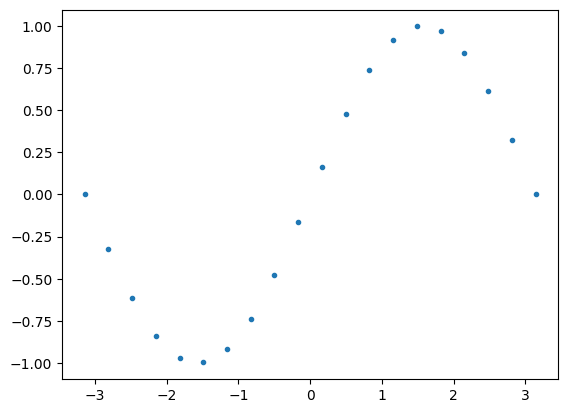

In [ ]:
import torch
import math
from matplotlib import pyplot as plt
import numpy as np

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
N = 20
x = torch.linspace(-math.pi, math.pi, N, dtype=dtype)
y = torch.sin(x)

plt.plot(x.numpy(),y.numpy(),'.')

# Manual derivatives
Now, let's fit the training data using a third order polynomial by minimizing the L2 norm.

Writing the i'th prediction as $y_{pred,i}=a+bx_i+cx_i^2+dx_i^3$, we would like our model to output $y_{pred,i} \approx y_i$.

Manually calculating the partial derivatives of the loss function w.r.t. $a$, $b$, $c$, and $d$ would not a big deal for this toy example. We just need to differentitate the loss function

$J = \sum{(y_{pred,i}-y_i)^2} = \sum{(a+bx_i+cx_i^2+dx_i^3 - y_i)^2}$

where we are summing over the training samples.

Applying the chain rule a few times, we can easily show that

$\frac{\partial J}{\partial a} = 2\sum{y_{pred,i}-y_i}$

$\frac{\partial J}{\partial b} = 2\sum{x_i(y_{pred,i}-y_i)}$

$\frac{\partial J}{\partial c} = 2\sum{x_i^2(y_{pred,i}-y_i)}$

$\frac{\partial J}{\partial d} = 2\sum{x_i^3(y_{pred,i}-y_i)}$

We now have what we need to fit the polynomial using gradient descent.

**Your task:** Fill in the gaps below (marked with `???`) and run the code.

99 47.779205322265625
199 30.965150833129883
299 20.110994338989258
399 13.095817565917969
499 8.555968284606934
599 5.613933563232422
699 3.704509735107422
799 2.4632859230041504
899 1.6550500392913818
999 1.1278047561645508
1099 0.783199667930603
1199 0.557508111000061
1299 0.4093823730945587
1399 0.31194737553596497
1499 0.2477065622806549
1599 0.2052488476037979
1699 0.17711777985095978
1799 0.15843161940574646
1899 0.14598627388477325
1999 0.13767577707767487
Result: y = 0.032205577939748764 + 0.8090043067932129 x + -0.005028693005442619 x^2 + -0.0849553644657135 x^3


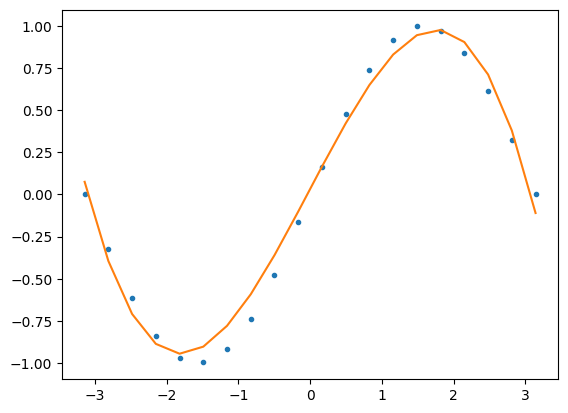

In [ ]:
# Create random Tensors for weights.
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-4
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Compute gradients of loss w.r.t. a, b, c, and d
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a = a - learning_rate * grad_a
    b = b - learning_rate * grad_b
    c = c - learning_rate * grad_c
    d = d - learning_rate * grad_d

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
plt.plot(x.numpy(),y.numpy(),'.',x.numpy(),y_pred.detach().numpy())

# Automatic differentiation
Manual differentiation can quickly get very hairy for large complex networks. Thankfully, we can use automatic differentiation to automate the computation of backward passes in our model (or neural network). The autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass of your model will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

This sounds complicated, it’s pretty simple to use in practice. Each Tensor represents a node in a computational graph. If x is a Tensor that has x.requires_grad=True then x.grad is another Tensor holding the gradient of x with respect to some scalar value.

Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example; now we don't need to manually implement the backward pass through the model.

**Your task:** Uncomment the correct `backward()` call and fill in the gaps marked with `???`.

99 25.508167266845703
199 16.4027099609375
299 10.569457054138184
399 6.830570220947266
499 4.432745933532715
599 2.894026756286621
699 1.9059420824050903
799 1.2709767818450928
899 0.862606406211853
999 0.5997380018234253
1099 0.43036624789237976
1199 0.3211241066455841
1299 0.250584214925766
1399 0.20498116314411163
1499 0.17545980215072632
1599 0.15632253885269165
1699 0.14389751851558685
1799 0.13581755757331848
1899 0.13055388629436493
1999 0.12711891531944275
Result: y = -0.014804989099502563 + 0.8151859641075134 x + 0.0023117042146623135 x^2 + -0.08575649559497833 x^3


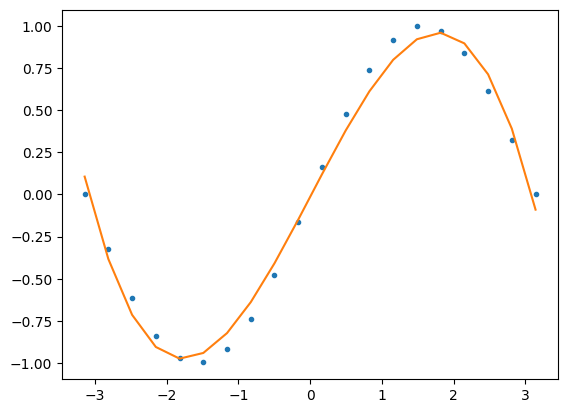

In [ ]:
# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-4
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of the loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
plt.plot(x.numpy(),y.numpy(),'.',x.numpy(),y_pred.detach().numpy())

# Defining new autograd functions
Instead of writing the polynomial as $y=a+bx+cx^2+dx^3$, we might want to write it as $y=a+b P_3(c+dx)$ where $P_3(x)=\frac{1}{2}\left(5x^3-3x\right)$ is
the [*Legendre polynomial*](https://en.wikipedia.org/wiki/Legendre_polynomials) of degree three.

This implementation computes the forward pass using operations on PyTorch
Tensors, and uses PyTorch autograd to compute gradients.

All we need to enable autograd is to implement a backward pass that calculates the *local gradient*, $P_3'(x)=\frac{3}{2}\left(5x^2-1\right)$.

**Question: What's the point of this?** Read the answer in the next section.


99 1.4355472326278687
199 0.7337876558303833
299 0.40682584047317505
399 0.4784679412841797
499 0.4625204801559448
599 0.542697548866272
699 0.2203645408153534
799 0.6270391941070557
899 0.18154898285865784
999 0.7319380640983582
1099 0.2053001970052719
1199 0.15018948912620544
1299 0.2176140546798706
1399 0.2004535049200058
1499 0.42892348766326904
1599 0.3235528767108917
1699 0.1922249048948288
1799 2.0524470806121826
1899 0.3988965153694153
1999 0.7007541060447693
Result: y = -5.513435819004542e-10 + -2.0981671810150146 * P3(1.2516974123855107e-09 + 0.20071791112422943 x)


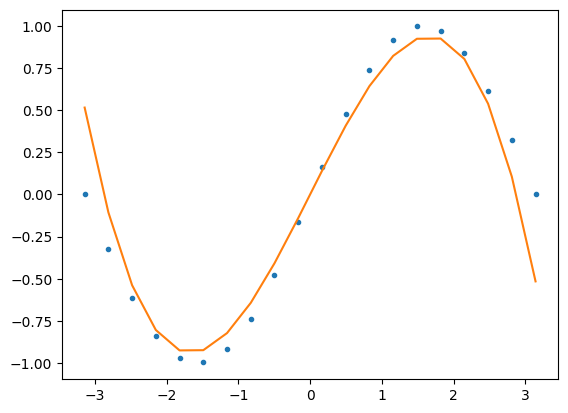

In [ ]:
import torch
import math

class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-3
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')
plt.plot(x.numpy(),y.numpy(),'.',x.numpy(),y_pred.detach().numpy())